In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io
from skimage import io
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
# Honey bee as 0.0
# Bumble bee as 1.0

labels = pd.read_csv('dataset/labels.csv', index_col=0)
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [3]:
y=labels['genus'].values
y

array([1., 1., 1., ..., 1., 0., 0.])

In [4]:
def get_image(row_id, root='dataset/images/'):
    
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = io.imread(file_path)
    
    return img

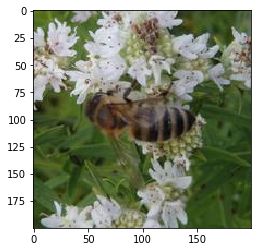

In [5]:
# Visualize Honey Bee
honey_bee_row = labels[labels.genus==0.0].index[5]
honey_bee = get_image(honey_bee_row)
plt.imshow(honey_bee)

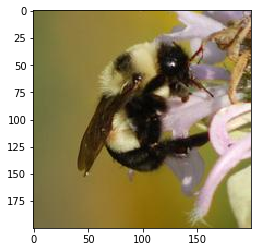

In [6]:
# Visualize Bumblee Bee

bumblee_bee_row = labels[labels.genus==1.0].index[5]
bumblee_bee = get_image(bumblee_bee_row)
plt.imshow(bumblee_bee)

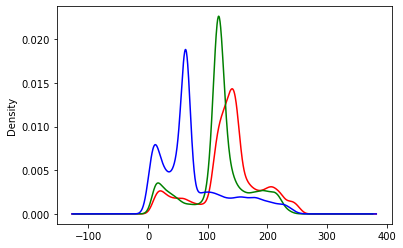

In [7]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r','g','b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)

    plt.show()
    
plot_rgb(bumblee_bee)


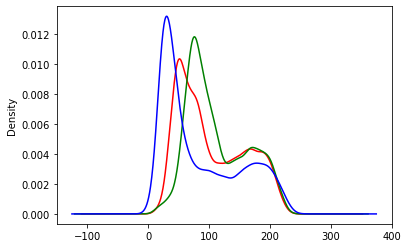

In [8]:
plot_rgb(honey_bee)

# Image manipulation with rgb2grey

In [9]:
from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

Color bumblee image has shape:  (200, 200, 3)
Greyscale bumblee image has shape:  (200, 200)


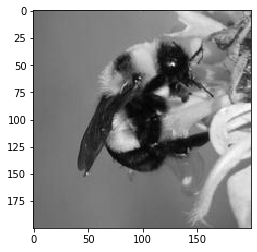

In [10]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bumblee = get_image(bumblee_bee_row)

# print the shape of the bombus image
print('Color bumblee image has shape: ', bumblee.shape)

# convert the bombus image to greyscale
grey_bumblee = rgb2grey(bumblee)

# show the greyscale image
plt.imshow(grey_bumblee, cmap=plt.cm.gray)

# greyscale bombus image only has one channel
print('Greyscale bumblee image has shape: ', grey_bumblee.shape)

# HOG Classification for Bumblee bee and Honey Bee 

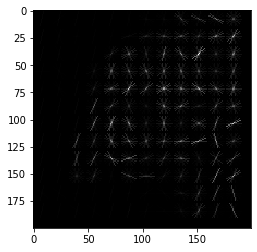

In [11]:
# run HOG using our greyscale bombus image

hog_features, hog_image = hog(grey_bumblee,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a grey colormap
plt.imshow(hog_image, cmap=plt.cm.gray)

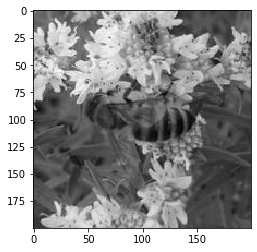

In [12]:
honey_bee_grey = rgb2grey(honey_bee)
plt.imshow(honey_bee_grey, cmap=plt.cm.gray)

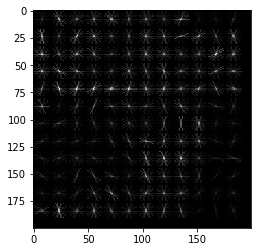

In [13]:
hog_features, hog_image = hog(honey_bee_grey,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a grey colormap
plt.imshow(hog_image, cmap=plt.cm.gray)

# Create image features

In [14]:
def create_features(img):
    # convert image to greyscale
    grey_image = rgb2grey(img)
    print(grey_image.flatten().shape)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    print(hog_features)
    print("hog_featuers shape", hog_features.shape)
    return hog_features

bumblee_features = create_features(bumblee)

print('The array has shape:', bumblee_features.shape)

(40000,)
[0.30236872 0.06344797 0.01298744 ... 0.02731015 0.27206735 0.1819952 ]
hog_featuers shape (8100,)
The array has shape: (8100,)


# Image Preprocess

In [15]:
def create_feature_matrix(label_dataframe):
    features_list = []

    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)

    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)
feature_matrix.shape

(40000,)
[0.11709115 0.12527831 0.09012395 ... 0.07845899 0.09084642 0.10375957]
hog_featuers shape (8100,)
(40000,)
[0.37385463 0.04977642 0.00903267 ... 0.028191   0.0174378  0.02438131]
hog_featuers shape (8100,)
(40000,)
[0.08052947 0.01039212 0.04487226 ... 0.00438562 0.00153095 0.00484867]
hog_featuers shape (8100,)
(40000,)
[0.03883467 0.0164191  0.0239246  ... 0.01427264 0.03202438 0.04954892]
hog_featuers shape (8100,)
(40000,)
[0.09831529 0.0543457  0.024363   ... 0.14723524 0.14948116 0.1350405 ]
hog_featuers shape (8100,)
(40000,)
[0.30236872 0.06344797 0.01298744 ... 0.02731015 0.27206735 0.1819952 ]
hog_featuers shape (8100,)
(40000,)
[0.2249593  0.19121275 0.04747469 ... 0.06742512 0.04347881 0.03206971]
hog_featuers shape (8100,)
(40000,)
[0.03555226 0.02660793 0.05565161 ... 0.00784077 0.01313068 0.03112595]
hog_featuers shape (8100,)
(40000,)
[0.0480884  0.00173894 0.00307915 ... 0.06133764 0.07601125 0.05690863]
hog_featuers shape (8100,)
(40000,)
[0.24238621 0.24238

(40000,)
[0.08270558 0.07567439 0.18801516 ... 0.05289677 0.1057016  0.1219331 ]
hog_featuers shape (8100,)
(40000,)
[0.20440663 0.17933384 0.1017216  ... 0.09496159 0.19155727 0.08900662]
hog_featuers shape (8100,)
(40000,)
[0.09666339 0.         0.26313674 ... 0.0913494  0.05151618 0.02922072]
hog_featuers shape (8100,)
(40000,)
[0.11155152 0.01516418 0.01290005 ... 0.00686722 0.0061005  0.00875437]
hog_featuers shape (8100,)
(40000,)
[0.15717266 0.07080325 0.03958943 ... 0.22595778 0.0897637  0.08293281]
hog_featuers shape (8100,)
(40000,)
[0.23074418 0.23074418 0.13896675 ... 0.10644703 0.11971501 0.13683419]
hog_featuers shape (8100,)
(40000,)
[0.03100281 0.00945168 0.0022844  ... 0.04938171 0.05897936 0.03769868]
hog_featuers shape (8100,)
(40000,)
[0.09220206 0.01411065 0.04778139 ... 0.11083807 0.10768581 0.13649728]
hog_featuers shape (8100,)
(40000,)
[0.07797338 0.04602668 0.04910905 ... 0.16688251 0.06837311 0.01561146]
hog_featuers shape (8100,)
(40000,)
[0.22922114 0.10535

[0.14878812 0.18158173 0.14392334 ... 0.14676943 0.08669378 0.06356972]
hog_featuers shape (8100,)
(40000,)
[0.23727462 0.10729779 0.07732223 ... 0.19391157 0.11095648 0.13268363]
hog_featuers shape (8100,)
(40000,)
[0.07533595 0.02860737 0.06624505 ... 0.17700472 0.08216077 0.07383329]
hog_featuers shape (8100,)
(40000,)
[0.07890679 0.08723158 0.10601763 ... 0.16581972 0.20171018 0.15826969]
hog_featuers shape (8100,)
(40000,)
[0.09818716 0.06678055 0.06654225 ... 0.18818656 0.13400085 0.19466199]
hog_featuers shape (8100,)
(40000,)
[0.08050263 0.2410719  0.2410719  ... 0.03865193 0.05346868 0.08703172]
hog_featuers shape (8100,)
(40000,)
[0.00177311 0.00191147 0.01472458 ... 0.04984866 0.00924835 0.00592388]
hog_featuers shape (8100,)
(40000,)
[0.01566142 0.02785098 0.08862426 ... 0.17316639 0.18308237 0.10063229]
hog_featuers shape (8100,)
(40000,)
[0.04483663 0.05433991 0.07811251 ... 0.06167776 0.04134384 0.031654  ]
hog_featuers shape (8100,)
(40000,)
[0.14651412 0.15415658 0.098

[0.12623389 0.1860795  0.14286853 ... 0.11309455 0.21155219 0.07238394]
hog_featuers shape (8100,)
(40000,)
[0.115687   0.02527942 0.03617242 ... 0.04982969 0.07998902 0.37805683]
hog_featuers shape (8100,)
(40000,)
[0.23353248 0.18617167 0.08981805 ... 0.07971305 0.10821797 0.24439441]
hog_featuers shape (8100,)
(40000,)
[0.18548981 0.21341861 0.21341861 ... 0.02106124 0.02099066 0.0081812 ]
hog_featuers shape (8100,)
(40000,)
[0.079671   0.02041559 0.03396814 ... 0.06618828 0.04068206 0.06606034]
hog_featuers shape (8100,)
(40000,)
[0.17661899 0.00402378 0.00390912 ... 0.04702322 0.06331835 0.04312518]
hog_featuers shape (8100,)
(40000,)
[0.18158604 0.02797751 0.01830096 ... 0.07335544 0.017385   0.03095659]
hog_featuers shape (8100,)
(40000,)
[0.07139567 0.02689698 0.01401634 ... 0.03181313 0.02986187 0.06184535]
hog_featuers shape (8100,)
(40000,)
[0.11874381 0.07185868 0.08129549 ... 0.06538979 0.04816631 0.08197841]
hog_featuers shape (8100,)
(40000,)
[0.07606496 0.10792427 0.069

[0.164538   0.0977811  0.05687065 ... 0.02243539 0.03375555 0.02684176]
hog_featuers shape (8100,)
(40000,)
[0.08053129 0.08996195 0.0685766  ... 0.25790332 0.25790332 0.13140145]
hog_featuers shape (8100,)
(40000,)
[0.02452289 0.01199008 0.02011759 ... 0.02996037 0.04238967 0.07035697]
hog_featuers shape (8100,)
(40000,)
[0.10659084 0.07095167 0.10916095 ... 0.14368932 0.11571237 0.0898766 ]
hog_featuers shape (8100,)
(40000,)
[0.11112243 0.04946829 0.05873727 ... 0.08405819 0.08635244 0.08908741]
hog_featuers shape (8100,)
(40000,)
[0.05103542 0.02902768 0.03851102 ... 0.06760215 0.05749772 0.03363581]
hog_featuers shape (8100,)
(40000,)
[0.0358901  0.10508497 0.1540536  ... 0.0403534  0.03531867 0.03370518]
hog_featuers shape (8100,)
(40000,)
[0.13835866 0.09424541 0.12116644 ... 0.03153454 0.0415778  0.06094698]
hog_featuers shape (8100,)
(40000,)
[0.01169476 0.01066608 0.0216076  ... 0.04403021 0.0264134  0.06107966]
hog_featuers shape (8100,)
(40000,)
[0.07777093 0.10980389 0.053

[0.05980724 0.00208973 0.00135843 ... 0.02244291 0.02895777 0.04064703]
hog_featuers shape (8100,)
(40000,)
[0.0322831  0.02095316 0.03233815 ... 0.09934684 0.0884243  0.04811668]
hog_featuers shape (8100,)
(40000,)
[0.13572607 0.05040805 0.09456376 ... 0.11519776 0.07991206 0.09457357]
hog_featuers shape (8100,)
(40000,)
[0.04601451 0.0096386  0.00939931 ... 0.01270005 0.00244872 0.00520815]
hog_featuers shape (8100,)
(40000,)
[0.07239564 0.03057206 0.02443851 ... 0.12203189 0.09034829 0.11619824]
hog_featuers shape (8100,)
(40000,)
[0.05268533 0.0245414  0.02357955 ... 0.21489216 0.12214597 0.04575692]
hog_featuers shape (8100,)
(40000,)
[0.03766084 0.00690331 0.01523232 ... 0.1576656  0.09432835 0.12925547]
hog_featuers shape (8100,)
(40000,)
[0.1784796  0.22101143 0.17060584 ... 0.0459951  0.14217171 0.25153184]
hog_featuers shape (8100,)
(40000,)
[0.22491298 0.22469133 0.08555452 ... 0.10993444 0.2874352  0.05979212]
hog_featuers shape (8100,)
(40000,)
[0.22953481 0.22953481 0.198

[0.03445501 0.00586468 0.0172482  ... 0.04934564 0.06558604 0.03076551]
hog_featuers shape (8100,)
(40000,)
[0.19804533 0.00340413 0.02773145 ... 0.00226789 0.00225164 0.00214072]
hog_featuers shape (8100,)
(40000,)
[0.02458336 0.02514356 0.00925014 ... 0.0522348  0.00997725 0.00995608]
hog_featuers shape (8100,)
(40000,)
[0.12471553 0.20425852 0.20425852 ... 0.05105947 0.05583972 0.04133241]
hog_featuers shape (8100,)
(40000,)
[0.12791271 0.07785185 0.06091676 ... 0.01226612 0.05170112 0.27100168]
hog_featuers shape (8100,)
(40000,)
[0.00549787 0.         0.00671991 ... 0.01078598 0.00359096 0.00864197]
hog_featuers shape (8100,)
(40000,)
[0.07850596 0.1610477  0.18348058 ... 0.22130001 0.20338926 0.10243725]
hog_featuers shape (8100,)
(40000,)
[0.06435382 0.02129458 0.01832516 ... 0.02100785 0.08035863 0.12938371]
hog_featuers shape (8100,)
(40000,)
[0.05573478 0.05538653 0.07566743 ... 0.07386422 0.06750553 0.05283335]
hog_featuers shape (8100,)
(40000,)
[0.25223026 0.1305433  0.076

(40000,)
[0.12069431 0.00884838 0.00354531 ... 0.12351235 0.15871292 0.22134209]
hog_featuers shape (8100,)
(40000,)
[0.02422105 0.00167519 0.00044618 ... 0.03372497 0.06644076 0.03611892]
hog_featuers shape (8100,)
(40000,)
[0.2277676  0.20376171 0.13976643 ... 0.04986973 0.03190276 0.01551843]
hog_featuers shape (8100,)
(40000,)
[0.25892163 0.25892163 0.07950796 ... 0.22459586 0.19431558 0.06518081]
hog_featuers shape (8100,)
(40000,)
[0.03803268 0.03353864 0.02363573 ... 0.05898569 0.02338364 0.09004931]
hog_featuers shape (8100,)
(40000,)
[0.00558389 0.00056086 0.00629286 ... 0.2890729  0.27300396 0.03508223]
hog_featuers shape (8100,)
(40000,)
[0.0785072  0.03924098 0.0369669  ... 0.02060844 0.05169587 0.06313302]
hog_featuers shape (8100,)
(40000,)
[0.12408055 0.0671098  0.0218603  ... 0.02618762 0.01447748 0.00321231]
hog_featuers shape (8100,)
(40000,)
[0.24516261 0.23268039 0.05684045 ... 0.004658   0.00455967 0.00227458]
hog_featuers shape (8100,)
(40000,)
[0.00808256 0.04639

[0.04452082 0.         0.00050278 ... 0.00683924 0.00273808 0.00381689]
hog_featuers shape (8100,)
(40000,)
[0.00769502 0.00921201 0.06249259 ... 0.01758892 0.00136866 0.00038331]
hog_featuers shape (8100,)
(40000,)
[0.06007526 0.03337605 0.11597131 ... 0.03878823 0.00745739 0.00318956]
hog_featuers shape (8100,)
(40000,)
[0.01028486 0.00058853 0.00542967 ... 0.19226861 0.16072896 0.08479653]
hog_featuers shape (8100,)
(40000,)
[0.07906995 0.01894253 0.02388461 ... 0.03225493 0.14149778 0.26845273]
hog_featuers shape (8100,)
(40000,)
[0.17967814 0.2157277  0.20918079 ... 0.06063568 0.03488979 0.01982658]
hog_featuers shape (8100,)
(40000,)
[0.0692878  0.09795339 0.08209425 ... 0.01624132 0.01054378 0.00417045]
hog_featuers shape (8100,)
(40000,)
[0.21477923 0.14673632 0.0737802  ... 0.22376016 0.22376016 0.17172269]
hog_featuers shape (8100,)
(40000,)
[0.23060589 0.1080887  0.08550248 ... 0.01539096 0.06076121 0.16428307]
hog_featuers shape (8100,)
(40000,)
[0.21227517 0.07779065 0.088

[0.03944744 0.00762776 0.21954759 ... 0.00774141 0.00770202 0.03012088]
hog_featuers shape (8100,)
(40000,)
[0.09781723 0.05507958 0.09041261 ... 0.03097018 0.0337383  0.03728573]
hog_featuers shape (8100,)
(40000,)
[0.15675645 0.         0.01055653 ... 0.35579684 0.06150462 0.00438508]
hog_featuers shape (8100,)
(40000,)
[0.06112656 0.0103315  0.10126468 ... 0.00950927 0.00950371 0.00748838]
hog_featuers shape (8100,)
(40000,)
[0.14176666 0.00930308 0.00946855 ... 0.02753016 0.02395339 0.02046707]
hog_featuers shape (8100,)
(40000,)
[0.19069489 0.05182865 0.01483829 ... 0.03281132 0.01512422 0.03796587]
hog_featuers shape (8100,)
(40000,)
[0.16548728 0.01335562 0.00661877 ... 0.03038227 0.06384641 0.08258814]
hog_featuers shape (8100,)
(40000,)
[0.10250348 0.22848659 0.22848659 ... 0.18611122 0.13272689 0.0492932 ]
hog_featuers shape (8100,)
(40000,)
[0.04649294 0.01169208 0.06559814 ... 0.18946378 0.23955992 0.17624365]
hog_featuers shape (8100,)
(40000,)
[0.07349488 0.20107598 0.213

[0.01576063 0.00240756 0.02483028 ... 0.1208817  0.05651844 0.06938803]
hog_featuers shape (8100,)
(40000,)
[0.03892007 0.0087947  0.01156448 ... 0.20136371 0.19644993 0.21449664]
hog_featuers shape (8100,)
(40000,)
[0.13240053 0.02148831 0.01771798 ... 0.1496332  0.08639246 0.04080773]
hog_featuers shape (8100,)
(40000,)
[0.21466263 0.06189953 0.02622093 ... 0.00841005 0.22664305 0.2750029 ]
hog_featuers shape (8100,)
(40000,)
[0.19757124 0.18423091 0.11986783 ... 0.1862238  0.1001542  0.08729716]
hog_featuers shape (8100,)
(40000,)
[0.07453808 0.22535829 0.22535829 ... 0.04192548 0.03816296 0.05748677]
hog_featuers shape (8100,)
(40000,)
[0.19009479 0.09863782 0.11492417 ... 0.03767347 0.08874303 0.24187909]
hog_featuers shape (8100,)
(40000,)
[0.05082386 0.07872019 0.0667967  ... 0.00977561 0.0204364  0.01532802]
hog_featuers shape (8100,)
(40000,)
[0.07436585 0.12402174 0.0426727  ... 0.08240581 0.09413689 0.04777071]
hog_featuers shape (8100,)
(40000,)
[0.13043202 0.05409527 0.070

[0.05077374 0.02699968 0.02626749 ... 0.01216408 0.00526811 0.00771461]
hog_featuers shape (8100,)
(40000,)
[0.06457799 0.02028963 0.0974931  ... 0.04013215 0.03782754 0.04920131]
hog_featuers shape (8100,)
(40000,)
[0.00716472 0.00392059 0.0013264  ... 0.24584342 0.24584342 0.02588094]
hog_featuers shape (8100,)
(40000,)
[0.04637743 0.00294036 0.00451876 ... 0.14075075 0.07469517 0.03533238]
hog_featuers shape (8100,)
(40000,)
[0.0595727  0.00977233 0.01028715 ... 0.24753359 0.11973389 0.07001642]
hog_featuers shape (8100,)
(40000,)
[0.15720118 0.1510336  0.06339564 ... 0.05698122 0.07419832 0.05482138]
hog_featuers shape (8100,)
(40000,)
[0.09134549 0.03176852 0.01864247 ... 0.01662388 0.01636658 0.02036805]
hog_featuers shape (8100,)
(40000,)
[0.05906302 0.11111471 0.10802986 ... 0.00951677 0.00413475 0.00293131]
hog_featuers shape (8100,)
(40000,)
[0.06104051 0.11853866 0.04500961 ... 0.07202821 0.01250428 0.00618913]
hog_featuers shape (8100,)
(40000,)
[0.23930929 0.24473721 0.132

[0.09058852 0.02621632 0.03341837 ... 0.10723075 0.21968248 0.14426681]
hog_featuers shape (8100,)
(40000,)
[0.08031855 0.03483155 0.01985361 ... 0.06259863 0.09668536 0.11233911]
hog_featuers shape (8100,)
(40000,)
[0.07293725 0.         0.00291584 ... 0.18947325 0.24502641 0.19077418]
hog_featuers shape (8100,)
(40000,)
[0.2612527  0.19321042 0.01601759 ... 0.0257834  0.01930289 0.03511866]
hog_featuers shape (8100,)
(40000,)
[0.06750159 0.00516753 0.01199921 ... 0.05699784 0.02526324 0.01105251]
hog_featuers shape (8100,)
(40000,)
[0.17675556 0.06522577 0.06354216 ... 0.13471413 0.23542811 0.06763617]
hog_featuers shape (8100,)
(40000,)
[0.08354894 0.11108522 0.15357708 ... 0.02920374 0.00975599 0.00104705]
hog_featuers shape (8100,)
(40000,)
[0.30982242 0.00474348 0.01743487 ... 0.02031157 0.02375583 0.00615557]
hog_featuers shape (8100,)
(40000,)
[0.12275015 0.09743772 0.03301331 ... 0.09558531 0.12931451 0.1064824 ]
hog_featuers shape (8100,)
(40000,)
[0.06686596 0.09333619 0.089

(40000,)
[0.10356116 0.04301048 0.05383349 ... 0.1479698  0.10812448 0.05554186]
hog_featuers shape (8100,)
(40000,)
[0.01937356 0.01764271 0.07642766 ... 0.00218457 0.00199928 0.00739472]
hog_featuers shape (8100,)
(40000,)
[0.10925775 0.12069914 0.20890046 ... 0.07936442 0.03421047 0.01773541]
hog_featuers shape (8100,)
(40000,)
[0.01842686 0.01512721 0.01892807 ... 0.15309908 0.21665882 0.14458343]
hog_featuers shape (8100,)
(40000,)
[0.10451822 0.00977979 0.00717493 ... 0.01142234 0.04412729 0.31189998]
hog_featuers shape (8100,)
(40000,)
[0.04196993 0.01062333 0.00548634 ... 0.08512949 0.1030549  0.04291917]
hog_featuers shape (8100,)
(40000,)
[0.00727562 0.00585708 0.00863735 ... 0.02360334 0.02466711 0.01315326]
hog_featuers shape (8100,)
(40000,)
[0.05079552 0.03164806 0.04930416 ... 0.10368748 0.24332644 0.22518172]
hog_featuers shape (8100,)
(40000,)
[0.33675006 0.03071219 0.04054817 ... 0.00730226 0.0054614  0.01807022]
hog_featuers shape (8100,)
(40000,)
[0.09201367 0.03382

[0.02621525 0.00643888 0.00635264 ... 0.03278294 0.05540899 0.05928208]
hog_featuers shape (8100,)
(40000,)
[0.04457721 0.02259126 0.03472604 ... 0.09583882 0.09043414 0.08672839]
hog_featuers shape (8100,)
(40000,)
[0.0793452  0.04450912 0.01274693 ... 0.06158763 0.07854168 0.05144628]
hog_featuers shape (8100,)
(40000,)
[0.02689128 0.00534443 0.00613869 ... 0.1337481  0.17717046 0.16079442]
hog_featuers shape (8100,)
(40000,)
[0.17115909 0.03216537 0.04929038 ... 0.18596304 0.20622416 0.08258334]
hog_featuers shape (8100,)
(40000,)
[0.11496459 0.05951355 0.07801668 ... 0.20864002 0.20864002 0.20864002]
hog_featuers shape (8100,)
(40000,)
[0.0219146  0.00150346 0.01220543 ... 0.05113287 0.1653461  0.09704755]
hog_featuers shape (8100,)
(40000,)
[0.03022857 0.00348714 0.00700858 ... 0.03032614 0.0029652  0.01699098]
hog_featuers shape (8100,)
(40000,)
[0.01744688 0.0017276  0.0143378  ... 0.08950243 0.10496286 0.06164908]
hog_featuers shape (8100,)
(40000,)
[0.04825012 0.00692448 0.016

[0.10208902 0.04084367 0.05184398 ... 0.02701847 0.03774459 0.04622735]
hog_featuers shape (8100,)
(40000,)
[0.21487429 0.17167901 0.06456038 ... 0.01358754 0.00610783 0.02464882]
hog_featuers shape (8100,)
(40000,)
[0.00174843 0.00122906 0.00249578 ... 0.01903845 0.01680812 0.00739439]
hog_featuers shape (8100,)
(40000,)
[3.44747394e-02 8.54863681e-05 7.88634590e-05 ... 1.32073821e-01
 7.64313642e-02 3.18038933e-02]
hog_featuers shape (8100,)
(40000,)
[0.17454841 0.08726008 0.03098102 ... 0.00500709 0.01207595 0.02291996]
hog_featuers shape (8100,)
(40000,)
[0.13550604 0.04052504 0.06310315 ... 0.17018731 0.11197906 0.10891147]
hog_featuers shape (8100,)
(40000,)
[0.01904968 0.00909711 0.05444775 ... 0.05861085 0.05956268 0.03099762]
hog_featuers shape (8100,)
(40000,)
[0.00100525 0.00018619 0.00104189 ... 0.00748211 0.00627252 0.0059633 ]
hog_featuers shape (8100,)
(40000,)
[0.06843593 0.08459334 0.08890387 ... 0.16098725 0.19369945 0.09475237]
hog_featuers shape (8100,)
(40000,)
[0.

[0.020129   0.0100468  0.00796826 ... 0.00427074 0.01985738 0.02172366]
hog_featuers shape (8100,)
(40000,)
[0.08855339 0.02992287 0.08627652 ... 0.00887184 0.01866    0.01562967]
hog_featuers shape (8100,)
(40000,)
[0.06306665 0.0142629  0.18769728 ... 0.05569914 0.06306277 0.09222734]
hog_featuers shape (8100,)
(40000,)
[0.04923805 0.11719457 0.06589572 ... 0.13803499 0.08106748 0.09181851]
hog_featuers shape (8100,)
(40000,)
[0.10772419 0.01509591 0.05258458 ... 0.11157198 0.07778324 0.0647972 ]
hog_featuers shape (8100,)
(40000,)
[0.22785755 0.00851428 0.00523296 ... 0.0075332  0.00890582 0.00726374]
hog_featuers shape (8100,)
(40000,)
[0.01355763 0.00814024 0.00520444 ... 0.10629686 0.12602724 0.05872905]
hog_featuers shape (8100,)
(40000,)
[0.0964194  0.1025945  0.19438564 ... 0.01564381 0.00588317 0.02157198]
hog_featuers shape (8100,)
(40000,)
[0.04986553 0.04875636 0.12443726 ... 0.00492832 0.00803431 0.02505051]
hog_featuers shape (8100,)
(40000,)
[0.12013131 0.09574241 0.093

[0.02091247 0.01794861 0.04048242 ... 0.24933513 0.12170595 0.06047392]
hog_featuers shape (8100,)
(40000,)
[0.13358764 0.09258241 0.08073051 ... 0.23128391 0.14376411 0.04264196]
hog_featuers shape (8100,)
(40000,)
[0.10871291 0.07784826 0.0334697  ... 0.10445101 0.15630344 0.06329311]
hog_featuers shape (8100,)
(40000,)
[0.08412622 0.01164449 0.00066252 ... 0.01401514 0.04257703 0.08612058]
hog_featuers shape (8100,)
(40000,)
[0.16102161 0.02986288 0.0959154  ... 0.05616075 0.07499941 0.14771905]
hog_featuers shape (8100,)
(40000,)
[0.06532476 0.00712876 0.01475478 ... 0.04899843 0.05296697 0.04421581]
hog_featuers shape (8100,)
(40000,)
[0.0627708  0.03933614 0.0213586  ... 0.09232039 0.07455949 0.02449224]
hog_featuers shape (8100,)
(40000,)
[0.11835982 0.03123834 0.01484787 ... 0.12034384 0.09600908 0.10343335]
hog_featuers shape (8100,)
(40000,)
[0.24974957 0.08388297 0.06272228 ... 0.0243633  0.02069266 0.01217969]
hog_featuers shape (8100,)
(40000,)
[0.0480421  0.01760917 0.024

[0.16363792 0.15942287 0.10360511 ... 0.02526148 0.01590301 0.00731192]
hog_featuers shape (8100,)
(40000,)
[0.1159158  0.02464055 0.01482108 ... 0.01559482 0.01181988 0.02890642]
hog_featuers shape (8100,)
(40000,)
[0.03079445 0.03062645 0.02357776 ... 0.0243251  0.03202711 0.0309921 ]
hog_featuers shape (8100,)
(40000,)
[0.1643831  0.09160624 0.13364883 ... 0.02534648 0.02578175 0.01751241]
hog_featuers shape (8100,)
(40000,)
[0.05689628 0.0304542  0.02673186 ... 0.04213003 0.05959376 0.03824229]
hog_featuers shape (8100,)
(40000,)
[0.08706531 0.03778307 0.12803951 ... 0.06375933 0.06665844 0.02925427]
hog_featuers shape (8100,)
(40000,)
[0.08490231 0.04551249 0.06859844 ... 0.1526478  0.29520021 0.01715953]
hog_featuers shape (8100,)
(40000,)
[0.02447994 0.01699808 0.01314113 ... 0.13070112 0.1112719  0.11771728]
hog_featuers shape (8100,)
(40000,)
[0.18421306 0.09206686 0.08052276 ... 0.0518103  0.07656653 0.22182637]
hog_featuers shape (8100,)
(40000,)
[0.1265689  0.07156952 0.046

[0.01460478 0.014148   0.03385203 ... 0.00190882 0.00292468 0.00514624]
hog_featuers shape (8100,)
(40000,)
[0.03861099 0.00561855 0.00570032 ... 0.01392207 0.02722837 0.04728033]
hog_featuers shape (8100,)
(40000,)
[0.05941803 0.02107469 0.05383333 ... 0.05901504 0.0847691  0.17903056]
hog_featuers shape (8100,)
(40000,)
[0.19762599 0.13189792 0.09547447 ... 0.18103711 0.1329823  0.11877153]
hog_featuers shape (8100,)
(40000,)
[0.0259511  0.01234122 0.00780527 ... 0.07124268 0.04392641 0.12174015]
hog_featuers shape (8100,)
(40000,)
[0.0562067  0.09614778 0.03802779 ... 0.19238438 0.15511398 0.09966175]
hog_featuers shape (8100,)
(40000,)
[0.06670217 0.10913095 0.1199214  ... 0.00683621 0.01585075 0.01430845]
hog_featuers shape (8100,)
(40000,)
[0.08406599 0.01003445 0.00110931 ... 0.08787696 0.1360372  0.07287312]
hog_featuers shape (8100,)
(40000,)
[0.20092618 0.10846933 0.10490964 ... 0.08082453 0.08414008 0.03722623]
hog_featuers shape (8100,)
(40000,)
[0.12183751 0.04083603 0.026

[0.39868181 0.39868181 0.29681949 ... 0.00958346 0.00539629 0.00272731]
hog_featuers shape (8100,)
(40000,)
[0.21934073 0.06420809 0.06482722 ... 0.00103451 0.0148754  0.01997107]
hog_featuers shape (8100,)
(40000,)
[0.10989062 0.08955586 0.20509281 ... 0.03460033 0.03872846 0.03133319]
hog_featuers shape (8100,)
(40000,)
[0.01741724 0.0148611  0.01978908 ... 0.00374194 0.00594476 0.01219033]
hog_featuers shape (8100,)
(40000,)
[0.09489159 0.11598853 0.05720414 ... 0.01642441 0.00857182 0.01055667]
hog_featuers shape (8100,)
(40000,)
[0.07268226 0.03595942 0.03496722 ... 0.12383197 0.14395424 0.10924647]
hog_featuers shape (8100,)
(40000,)
[0.18701467 0.06917035 0.06472476 ... 0.01271491 0.00690029 0.02655004]
hog_featuers shape (8100,)
(40000,)
[0.14205235 0.05625071 0.0802094  ... 0.00613473 0.00885355 0.05209677]
hog_featuers shape (8100,)
(40000,)
[0.22711361 0.2252916  0.2193443  ... 0.1230856  0.11576853 0.1598876 ]
hog_featuers shape (8100,)
(40000,)
[0.21741664 0.21741664 0.217

[0.09410726 0.22581858 0.03476042 ... 0.02904168 0.05858095 0.24632117]
hog_featuers shape (8100,)
(40000,)
[0.23738683 0.10524817 0.06176415 ... 0.04568854 0.02890235 0.02797054]
hog_featuers shape (8100,)
(40000,)
[0.13729709 0.06678297 0.05036091 ... 0.01403681 0.0107228  0.01954042]
hog_featuers shape (8100,)
(40000,)
[0.07015139 0.03350379 0.03211328 ... 0.26125401 0.26125401 0.07339014]
hog_featuers shape (8100,)
(40000,)
[0.04638577 0.05166747 0.16967699 ... 0.06159102 0.05293572 0.11379144]
hog_featuers shape (8100,)
(40000,)
[0.20741923 0.0076777  0.02588123 ... 0.08098495 0.08579495 0.08318401]
hog_featuers shape (8100,)
(40000,)
[0.17976468 0.12144153 0.20523763 ... 0.00634721 0.00413697 0.00357303]
hog_featuers shape (8100,)
(40000,)
[0.13782457 0.11868959 0.08806057 ... 0.182751   0.25363934 0.25363934]
hog_featuers shape (8100,)
(40000,)
[0.21289876 0.1194777  0.08534694 ... 0.06106195 0.23835389 0.23835389]
hog_featuers shape (8100,)
(40000,)
[0.08531316 0.00551463 0.002

[0.09165415 0.06005787 0.08780471 ... 0.21047303 0.20561955 0.1782917 ]
hog_featuers shape (8100,)
(40000,)
[0.18765869 0.00427703 0.00525559 ... 0.01958027 0.03612121 0.01982115]
hog_featuers shape (8100,)
(40000,)
[0.11425845 0.0228115  0.03992805 ... 0.13238283 0.13308582 0.07044758]
hog_featuers shape (8100,)
(40000,)
[0.13341402 0.         0.         ... 0.19039524 0.0972552  0.17390808]
hog_featuers shape (8100,)
(40000,)
[0.01897322 0.0118729  0.03892667 ... 0.09448635 0.14804544 0.19253597]
hog_featuers shape (8100,)
(40000,)
[0.15785135 0.22647396 0.22647396 ... 0.02120599 0.07405521 0.18117478]
hog_featuers shape (8100,)
(40000,)
[0.03757066 0.02155926 0.04457064 ... 0.11767757 0.1482515  0.16819932]
hog_featuers shape (8100,)
(40000,)
[0.01573036 0.00468291 0.00705466 ... 0.01833396 0.02162304 0.02483325]
hog_featuers shape (8100,)
(40000,)
[0.11383847 0.16124895 0.13254215 ... 0.0966584  0.08992121 0.04917748]
hog_featuers shape (8100,)
(40000,)
[0.0356555  0.0148794  0.022

[0.10225115 0.0250521  0.02343791 ... 0.05813576 0.02112883 0.02213554]
hog_featuers shape (8100,)
(40000,)
[0.1569633  0.0780031  0.0551569  ... 0.00474531 0.00230776 0.        ]
hog_featuers shape (8100,)
(40000,)
[0.14824137 0.01351084 0.02392601 ... 0.02681118 0.02235171 0.02450464]
hog_featuers shape (8100,)
(40000,)
[0.07303874 0.09511815 0.04282036 ... 0.00406616 0.00276874 0.00096112]
hog_featuers shape (8100,)
(40000,)
[0.05211667 0.03607968 0.05235847 ... 0.00673298 0.01461729 0.02846722]
hog_featuers shape (8100,)
(40000,)
[0.14248527 0.19786476 0.14693552 ... 0.09784871 0.09180467 0.0783813 ]
hog_featuers shape (8100,)
(40000,)
[0.03263381 0.00222453 0.         ... 0.09396476 0.08383787 0.05374962]
hog_featuers shape (8100,)
(40000,)
[0.2446378  0.02370057 0.05995824 ... 0.18431037 0.01857438 0.01143744]
hog_featuers shape (8100,)
(40000,)
[0.07532781 0.02270585 0.10960484 ... 0.00484574 0.0058577  0.00231209]
hog_featuers shape (8100,)
(40000,)
[0.0346143  0.02741431 0.017

[0.06623115 0.01849557 0.0193906  ... 0.04432622 0.05178673 0.05089638]
hog_featuers shape (8100,)
(40000,)
[0.12244626 0.03635573 0.01646121 ... 0.01292705 0.019403   0.01988619]
hog_featuers shape (8100,)
(40000,)
[0.20153363 0.22146288 0.05936846 ... 0.2103084  0.15243494 0.21419126]
hog_featuers shape (8100,)
(40000,)
[0.01634456 0.00401311 0.0099056  ... 0.17745842 0.24180386 0.07529545]
hog_featuers shape (8100,)
(40000,)
[0.27036095 0.04313357 0.10912026 ... 0.24019311 0.05842543 0.05317538]
hog_featuers shape (8100,)
(40000,)
[0.22356114 0.12142401 0.15154318 ... 0.19911588 0.15770851 0.07287304]
hog_featuers shape (8100,)
(40000,)
[0.24512574 0.06910884 0.06036451 ... 0.00634389 0.00290332 0.00096841]
hog_featuers shape (8100,)
(40000,)
[0.07799054 0.03678061 0.0460091  ... 0.2193178  0.09749645 0.04493539]
hog_featuers shape (8100,)
(40000,)
[0.03049792 0.03121164 0.12019432 ... 0.23703747 0.12162635 0.04013436]
hog_featuers shape (8100,)
(40000,)
[0.21152984 0.05686566 0.011

[0.09532628 0.04184104 0.01196606 ... 0.0508691  0.07971965 0.04618123]
hog_featuers shape (8100,)
(40000,)
[0.00852037 0.00658144 0.04765801 ... 0.02628346 0.02064599 0.03394924]
hog_featuers shape (8100,)
(40000,)
[0.31115918 0.0013259  0.00157164 ... 0.03299555 0.03777125 0.02800482]
hog_featuers shape (8100,)
(40000,)
[0.13341524 0.06799804 0.07876158 ... 0.20972333 0.12088207 0.05069929]
hog_featuers shape (8100,)
(40000,)
[0.03364385 0.01945213 0.02734485 ... 0.03713496 0.01311214 0.00821055]
hog_featuers shape (8100,)
(40000,)
[0.06477428 0.01679989 0.03335381 ... 0.1439838  0.18397453 0.1135379 ]
hog_featuers shape (8100,)
(40000,)
[0.28046222 0.04086058 0.01483113 ... 0.07224662 0.0180834  0.03639266]
hog_featuers shape (8100,)
(40000,)
[0.14976363 0.12397195 0.11846346 ... 0.05056937 0.02806234 0.1403374 ]
hog_featuers shape (8100,)
(40000,)
[0.17354242 0.02431147 0.08633363 ... 0.10053748 0.07659707 0.05600233]
hog_featuers shape (8100,)
(40000,)
[0.06750466 0.00250833 0.002

(40000,)
[0.04088661 0.05361896 0.25553749 ... 0.10410722 0.25176489 0.11905398]
hog_featuers shape (8100,)
(40000,)
[0.15594442 0.09100217 0.13476731 ... 0.04719109 0.01386725 0.00505561]
hog_featuers shape (8100,)
(40000,)
[0.14967243 0.10508243 0.14955428 ... 0.07945652 0.16897069 0.11982381]
hog_featuers shape (8100,)
(40000,)
[0.15432795 0.16937122 0.21743107 ... 0.13078583 0.03904842 0.12425974]
hog_featuers shape (8100,)
(40000,)
[0.15005899 0.09916621 0.09576427 ... 0.21126433 0.21126433 0.21126433]
hog_featuers shape (8100,)
(40000,)
[0.01755059 0.01733455 0.01027753 ... 0.06989897 0.07097235 0.04856975]
hog_featuers shape (8100,)
(40000,)
[0.22078504 0.06763403 0.10070337 ... 0.13640543 0.05611084 0.04407223]
hog_featuers shape (8100,)
(40000,)
[0.08835283 0.01090066 0.01516916 ... 0.06145958 0.08853542 0.07809326]
hog_featuers shape (8100,)
(40000,)
[0.02314209 0.04818686 0.12829549 ... 0.04646716 0.03185964 0.04432381]
hog_featuers shape (8100,)
(40000,)
[0.02112449 0.05227

[0.10973108 0.05901571 0.07079809 ... 0.10800207 0.11388974 0.11063528]
hog_featuers shape (8100,)
(40000,)
[0.09774646 0.16743875 0.32314909 ... 0.27841817 0.27841817 0.16212205]
hog_featuers shape (8100,)
(40000,)
[0.13562355 0.17658585 0.12495493 ... 0.07319297 0.24814953 0.24814953]
hog_featuers shape (8100,)
(40000,)
[0.03217392 0.00119824 0.02437809 ... 0.06999452 0.07349604 0.0510394 ]
hog_featuers shape (8100,)
(40000,)
[0.07263716 0.07158705 0.07271755 ... 0.12653895 0.09327208 0.0534655 ]
hog_featuers shape (8100,)
(40000,)
[0.07604889 0.07526831 0.07364339 ... 0.00626703 0.01401546 0.03451445]
hog_featuers shape (8100,)
(40000,)
[0.02681368 0.010683   0.01788713 ... 0.14666992 0.07187898 0.00797377]
hog_featuers shape (8100,)
(40000,)
[0.03197022 0.08052025 0.12074318 ... 0.16652061 0.22292888 0.10405744]
hog_featuers shape (8100,)
(40000,)
[0.09238125 0.04987527 0.04913468 ... 0.04508208 0.05092495 0.03371147]
hog_featuers shape (8100,)
(40000,)
[0.1394247  0.07578614 0.125

[0.14617136 0.04070238 0.03836946 ... 0.0506623  0.12530345 0.12717387]
hog_featuers shape (8100,)
(40000,)
[0.08779856 0.07057712 0.09712865 ... 0.02643319 0.0407072  0.15698308]
hog_featuers shape (8100,)
(40000,)
[0.1306514  0.0685351  0.0615705  ... 0.00396332 0.00360882 0.01003971]
hog_featuers shape (8100,)
(40000,)
[0.27109692 0.27109692 0.08674439 ... 0.02725838 0.08489694 0.07597993]
hog_featuers shape (8100,)
(40000,)
[0.02773489 0.00320877 0.00863721 ... 0.00807327 0.01278682 0.0143769 ]
hog_featuers shape (8100,)
(40000,)
[0.06042679 0.04762175 0.04499036 ... 0.05788069 0.04001203 0.09233389]
hog_featuers shape (8100,)
(40000,)
[0.06883157 0.1204919  0.04841905 ... 0.02343343 0.0210841  0.03558402]
hog_featuers shape (8100,)
(40000,)
[0.00526153 0.         0.         ... 0.02173199 0.04517274 0.0675733 ]
hog_featuers shape (8100,)
(40000,)
[0.02303807 0.00284536 0.         ... 0.09122569 0.19296192 0.07243121]
hog_featuers shape (8100,)
(40000,)
[0.23467373 0.         0.017

(40000,)
[0.03412577 0.00263    0.00439895 ... 0.03023162 0.01280685 0.04202935]
hog_featuers shape (8100,)
(40000,)
[0.05563998 0.00261878 0.03290663 ... 0.17759177 0.08486172 0.05838951]
hog_featuers shape (8100,)
(40000,)
[0.16888414 0.21018319 0.1637035  ... 0.20209245 0.12638028 0.06329571]
hog_featuers shape (8100,)
(40000,)
[0.13563733 0.02234654 0.02523245 ... 0.09025391 0.08131394 0.07340387]
hog_featuers shape (8100,)
(40000,)
[0.11291888 0.02819896 0.13287158 ... 0.12264008 0.13286898 0.10508289]
hog_featuers shape (8100,)
(40000,)
[0.02656662 0.00261919 0.0082221  ... 0.24781725 0.24781725 0.24781725]
hog_featuers shape (8100,)
(40000,)
[0.09907485 0.01844906 0.02172433 ... 0.122489   0.22277902 0.20055553]
hog_featuers shape (8100,)
(40000,)
[0.09440384 0.014721   0.06588269 ... 0.11041151 0.16186937 0.05799891]
hog_featuers shape (8100,)
(40000,)
[0.05802202 0.02131443 0.01317952 ... 0.11024319 0.0276225  0.02321999]
hog_featuers shape (8100,)
(40000,)
[0.10685307 0.04111

[0.05708412 0.06187131 0.03847417 ... 0.24827494 0.24827494 0.10587637]
hog_featuers shape (8100,)
(40000,)
[0.04093408 0.02989677 0.03497137 ... 0.08241829 0.04145002 0.02104948]
hog_featuers shape (8100,)
(40000,)
[0.0123611  0.01534329 0.03246207 ... 0.03197463 0.05287369 0.06526506]
hog_featuers shape (8100,)
(40000,)
[0.0231084  0.01505313 0.01976921 ... 0.24862854 0.11222124 0.00882871]
hog_featuers shape (8100,)
(40000,)
[0.07337584 0.03372809 0.04327147 ... 0.01930649 0.01797973 0.02745782]
hog_featuers shape (8100,)
(40000,)
[0.0249922  0.02222641 0.01220815 ... 0.11451889 0.23157143 0.13971244]
hog_featuers shape (8100,)
(40000,)
[0.0875996  0.23839213 0.23839213 ... 0.03240397 0.04384353 0.08200149]
hog_featuers shape (8100,)
(40000,)
[0.05996992 0.09584035 0.05474271 ... 0.09101665 0.25071306 0.20381298]
hog_featuers shape (8100,)
(40000,)
[0.07916275 0.06287049 0.13531764 ... 0.00079007 0.00075628 0.00049103]
hog_featuers shape (8100,)
(40000,)
[0.12277483 0.18376609 0.204

[0.25675219 0.25675219 0.08689862 ... 0.15928718 0.23752958 0.15297571]
hog_featuers shape (8100,)
(40000,)
[0.02568151 0.01934328 0.00471541 ... 0.06738493 0.03310118 0.05298235]
hog_featuers shape (8100,)
(40000,)
[0.06958629 0.07184345 0.08987009 ... 0.09943898 0.22496195 0.15992792]
hog_featuers shape (8100,)
(40000,)
[0.0731853  0.02788809 0.02309008 ... 0.03444103 0.01795484 0.01696547]
hog_featuers shape (8100,)
(40000,)
[0.19850174 0.07269588 0.06147674 ... 0.04480488 0.09660902 0.09996815]
hog_featuers shape (8100,)
(40000,)
[0.02699043 0.00432501 0.06692039 ... 0.06572566 0.08376561 0.11546185]
hog_featuers shape (8100,)
(40000,)
[0.13725346 0.06941215 0.08652827 ... 0.12713626 0.04886821 0.04150874]
hog_featuers shape (8100,)
(40000,)
[0.03154982 0.02967142 0.0957338  ... 0.18919466 0.17124726 0.06655891]
hog_featuers shape (8100,)
(40000,)
[0.01555714 0.01790407 0.09434416 ... 0.05308622 0.13182773 0.04958343]
hog_featuers shape (8100,)
(40000,)
[0.01971204 0.02372433 0.103

[0.05232843 0.02309434 0.02055165 ... 0.16042615 0.22898649 0.21360977]
hog_featuers shape (8100,)
(40000,)
[0.26377274 0.26377274 0.16139308 ... 0.0425269  0.03714658 0.02165563]
hog_featuers shape (8100,)
(40000,)
[0.08981406 0.01480101 0.02936928 ... 0.0249092  0.03161619 0.03352198]
hog_featuers shape (8100,)
(40000,)
[0.05877433 0.04083864 0.14591203 ... 0.00169029 0.01265701 0.01660149]
hog_featuers shape (8100,)
(40000,)
[0.04138522 0.03876232 0.01827037 ... 0.25753711 0.1967718  0.07075714]
hog_featuers shape (8100,)
(40000,)
[0.02097553 0.00626488 0.00553699 ... 0.04744053 0.03781669 0.0173849 ]
hog_featuers shape (8100,)
(40000,)
[0.21252391 0.21252391 0.21252391 ... 0.02694449 0.01319747 0.01404029]
hog_featuers shape (8100,)
(40000,)
[0.09300621 0.07089904 0.10840597 ... 0.05860671 0.06429669 0.05327519]
hog_featuers shape (8100,)
(40000,)
[0.04789712 0.01642085 0.01523347 ... 0.02954394 0.0294275  0.01894228]
hog_featuers shape (8100,)
(40000,)
[0.13809039 0.09805827 0.055

(40000,)
[0.17198036 0.04071371 0.02745537 ... 0.18565453 0.20462305 0.17032764]
hog_featuers shape (8100,)
(40000,)
[0.00420368 0.00142677 0.00514826 ... 0.23236793 0.23236793 0.04161946]
hog_featuers shape (8100,)
(40000,)
[0.13965693 0.04992337 0.05745162 ... 0.09349643 0.11968194 0.099259  ]
hog_featuers shape (8100,)
(40000,)
[0.06479812 0.01518425 0.01481538 ... 0.20385411 0.09888234 0.0904531 ]
hog_featuers shape (8100,)
(40000,)
[0.1103609  0.03820252 0.04748817 ... 0.21009273 0.21009273 0.12322183]
hog_featuers shape (8100,)
(40000,)
[0.15906574 0.09285843 0.06463669 ... 0.0123852  0.02214259 0.0997902 ]
hog_featuers shape (8100,)
(40000,)
[0.04233999 0.08397643 0.15542913 ... 0.00140962 0.00182016 0.00520685]
hog_featuers shape (8100,)
(40000,)
[0.12328811 0.07566675 0.03821183 ... 0.1123307  0.09473877 0.05678747]
hog_featuers shape (8100,)
(40000,)
[0.01611422 0.01064537 0.01038727 ... 0.20911981 0.12534202 0.01272944]
hog_featuers shape (8100,)
(40000,)
[0.07994594 0.04035

[0.16110214 0.13121432 0.10999922 ... 0.06934994 0.09475739 0.08458011]
hog_featuers shape (8100,)
(40000,)
[0.3201819  0.         0.02462381 ... 0.04542178 0.00429965 0.01913299]
hog_featuers shape (8100,)
(40000,)
[0.13918151 0.05554308 0.1805491  ... 0.01813353 0.0046182  0.00318465]
hog_featuers shape (8100,)
(40000,)
[0.09880479 0.032662   0.02624669 ... 0.10611158 0.13878296 0.15677676]
hog_featuers shape (8100,)
(40000,)
[0.06381461 0.04068964 0.05227495 ... 0.20608628 0.03576199 0.00430926]
hog_featuers shape (8100,)
(40000,)
[0.11299669 0.18485931 0.1891507  ... 0.23388371 0.1146956  0.05525379]
hog_featuers shape (8100,)
(40000,)
[0.02273821 0.03922096 0.04102155 ... 0.01038679 0.00275769 0.00139486]
hog_featuers shape (8100,)
(40000,)
[0.01177095 0.00191523 0.00940506 ... 0.21280686 0.14538712 0.04458795]
hog_featuers shape (8100,)
(40000,)
[0.10648645 0.06738198 0.01314355 ... 0.01613629 0.01946207 0.0119729 ]
hog_featuers shape (8100,)
(40000,)
[0.09211577 0.03003691 0.039

[0.06996015 0.03584919 0.01635521 ... 0.10061719 0.11520496 0.20099194]
hog_featuers shape (8100,)
(40000,)
[0.16046451 0.17334183 0.1105971  ... 0.01494992 0.02150699 0.04112127]
hog_featuers shape (8100,)
(40000,)
[0.03353098 0.01019295 0.00967332 ... 0.10527383 0.24130475 0.15297673]
hog_featuers shape (8100,)
(40000,)
[0.09036319 0.01379271 0.03485259 ... 0.01817526 0.02677866 0.06522008]
hog_featuers shape (8100,)
(40000,)
[0.23786185 0.10970134 0.15575275 ... 0.02201874 0.03458143 0.04549951]
hog_featuers shape (8100,)
(40000,)
[0.00951356 0.         0.00145038 ... 0.24693268 0.18342362 0.05022731]
hog_featuers shape (8100,)
(40000,)
[0.01470484 0.02430353 0.0145169  ... 0.05716558 0.03335614 0.02823113]
hog_featuers shape (8100,)
(40000,)
[0.01361037 0.00842839 0.00902848 ... 0.01831418 0.03754339 0.06042741]
hog_featuers shape (8100,)
(40000,)
[0.11403928 0.22276864 0.06707651 ... 0.01577369 0.03527424 0.04544096]
hog_featuers shape (8100,)
(40000,)
[0.07316697 0.03896786 0.039

(40000,)
[0.07103214 0.02908576 0.01287711 ... 0.1361177  0.14495544 0.21408126]
hog_featuers shape (8100,)
(40000,)
[0.02040475 0.00180761 0.00443949 ... 0.01644563 0.00957146 0.        ]
hog_featuers shape (8100,)
(40000,)
[0.01845769 0.03098984 0.04644965 ... 0.08206955 0.23774817 0.23774817]
hog_featuers shape (8100,)
(40000,)
[0.04002255 0.01667028 0.00443385 ... 0.04523901 0.10305908 0.06991064]
hog_featuers shape (8100,)
(40000,)
[0.04486184 0.01923426 0.01910285 ... 0.02842277 0.10472657 0.28887098]
hog_featuers shape (8100,)
(40000,)
[0.02329904 0.02589424 0.         ... 0.23676817 0.12770707 0.05316716]
hog_featuers shape (8100,)
(40000,)
[0.08787108 0.08287223 0.14216147 ... 0.04372533 0.1358799  0.20793111]
hog_featuers shape (8100,)
(40000,)
[0.15539452 0.1192702  0.06832649 ... 0.12445524 0.11843582 0.07514986]
hog_featuers shape (8100,)
(40000,)
[0.0219434  0.004489   0.01096284 ... 0.2433264  0.2433264  0.20598232]
hog_featuers shape (8100,)
(40000,)
[0.07722331 0.24428

[0.11755511 0.00543354 0.0102722  ... 0.01741691 0.00558482 0.01139543]
hog_featuers shape (8100,)
(40000,)
[0.07415806 0.08759403 0.08586772 ... 0.08732818 0.26009248 0.23739982]
hog_featuers shape (8100,)
(40000,)
[0.09986419 0.10088042 0.05101888 ... 0.12706487 0.12824926 0.11437997]
hog_featuers shape (8100,)
(40000,)
[0.06051729 0.04470354 0.09602582 ... 0.0284256  0.01155028 0.00877757]
hog_featuers shape (8100,)
(40000,)
[0.22875256 0.22875256 0.13793876 ... 0.00723309 0.01267056 0.01457696]
hog_featuers shape (8100,)
(40000,)
[0.0405923  0.         0.0106594  ... 0.02807792 0.07841243 0.24752237]
hog_featuers shape (8100,)
(40000,)
[0.13920013 0.11285562 0.11357438 ... 0.0199482  0.02555086 0.25487753]
hog_featuers shape (8100,)
(40000,)
[0.20062812 0.16392318 0.17196352 ... 0.11697543 0.07709122 0.09283081]
hog_featuers shape (8100,)
(40000,)
[0.07772063 0.02573956 0.01315694 ... 0.17635875 0.21581398 0.05056205]
hog_featuers shape (8100,)
(40000,)
[0.13632198 0.11025358 0.107

[0.08508494 0.01312084 0.01664339 ... 0.0468422  0.17636612 0.21288425]
hog_featuers shape (8100,)
(40000,)
[0.10474273 0.03589931 0.03681264 ... 0.03715953 0.04051722 0.05595473]
hog_featuers shape (8100,)
(40000,)
[0.20387012 0.11270702 0.17210209 ... 0.22753662 0.11949088 0.09292934]
hog_featuers shape (8100,)
(40000,)
[0.07177217 0.07683246 0.13076575 ... 0.07172766 0.04029087 0.09837614]
hog_featuers shape (8100,)
(40000,)
[0.09058464 0.01405079 0.03295772 ... 0.03992517 0.00890071 0.00687245]
hog_featuers shape (8100,)
(40000,)
[0.24198077 0.24198077 0.09715817 ... 0.06304497 0.0497394  0.09074648]
hog_featuers shape (8100,)
(40000,)
[0.24153609 0.05542103 0.01685278 ... 0.08973592 0.23233385 0.25808468]
hog_featuers shape (8100,)
(40000,)
[0.09263189 0.04872936 0.02190126 ... 0.08161797 0.167668   0.07384665]
hog_featuers shape (8100,)
(40000,)
[0.2363408  0.13643768 0.12345217 ... 0.15955564 0.13393154 0.08976877]
hog_featuers shape (8100,)
(40000,)
[0.10301915 0.02496146 0.020

[0.13630139 0.06679225 0.10964771 ... 0.11374228 0.03874706 0.03263926]
hog_featuers shape (8100,)
(40000,)
[0.06215554 0.0654135  0.05781111 ... 0.0802001  0.08000947 0.12654177]
hog_featuers shape (8100,)
(40000,)
[0.06543822 0.05579083 0.05605696 ... 0.02131191 0.10785329 0.17245683]
hog_featuers shape (8100,)
(40000,)
[0.04243334 0.         0.00093897 ... 0.13310704 0.24087654 0.14704349]
hog_featuers shape (8100,)
(40000,)
[0.07543963 0.2416297  0.13088231 ... 0.12164091 0.07260463 0.05138173]
hog_featuers shape (8100,)
(40000,)
[0.22419062 0.11254832 0.14482782 ... 0.11890588 0.04991294 0.01586249]
hog_featuers shape (8100,)
(40000,)
[0.08986756 0.07372515 0.06931131 ... 0.10820786 0.06152442 0.04855188]
hog_featuers shape (8100,)
(40000,)
[0.00999523 0.0084778  0.01094921 ... 0.05690697 0.110908   0.11023567]
hog_featuers shape (8100,)
(40000,)
[0.12648192 0.01892723 0.0392857  ... 0.2243291  0.2243291  0.2243291 ]
hog_featuers shape (8100,)
(40000,)
[0.00267173 0.00163517 0.002

[0.01456288 0.01104392 0.0095326  ... 0.07940342 0.14855542 0.08190458]
hog_featuers shape (8100,)
(40000,)
[0.07592768 0.00745893 0.00471424 ... 0.10884884 0.11206712 0.01660086]
hog_featuers shape (8100,)
(40000,)
[0.10491452 0.07348893 0.08510862 ... 0.14100194 0.09611263 0.02471342]
hog_featuers shape (8100,)
(40000,)
[0.08689256 0.05575555 0.04508955 ... 0.17398732 0.06217408 0.035326  ]
hog_featuers shape (8100,)
(40000,)
[0.0652748  0.01325342 0.00976601 ... 0.09187904 0.01309821 0.00522149]
hog_featuers shape (8100,)
(40000,)
[0.12048475 0.06665397 0.09143271 ... 0.12810816 0.06584558 0.05752761]
hog_featuers shape (8100,)
(40000,)
[0.0734822  0.01301959 0.07829085 ... 0.04493502 0.05693828 0.03326616]
hog_featuers shape (8100,)
(40000,)
[0.10849875 0.06379635 0.08981818 ... 0.17296369 0.08136417 0.07149006]
hog_featuers shape (8100,)
(40000,)
[0.07968801 0.09369277 0.06935482 ... 0.08423879 0.09028469 0.05425632]
hog_featuers shape (8100,)
(40000,)
[0.00338675 0.00588419 0.011

(40000,)
[0.21088316 0.22879692 0.09305234 ... 0.01667916 0.01498394 0.00448665]
hog_featuers shape (8100,)
(40000,)
[0.21794652 0.21794652 0.21794652 ... 0.22583907 0.22583907 0.22583907]
hog_featuers shape (8100,)
(40000,)
[0.15615114 0.05402905 0.03856995 ... 0.09399993 0.03215417 0.02453345]
hog_featuers shape (8100,)
(40000,)
[0.08842614 0.1005609  0.0393373  ... 0.03638422 0.03465017 0.01642978]
hog_featuers shape (8100,)
(40000,)
[0.09740953 0.17992807 0.13430302 ... 0.31893708 0.31893708 0.08584807]
hog_featuers shape (8100,)
(40000,)
[0.15409221 0.05033673 0.02560972 ... 0.03011078 0.01753154 0.02729051]
hog_featuers shape (8100,)
(40000,)
[0.11435328 0.01346993 0.09022492 ... 0.1454861  0.10597195 0.15427522]
hog_featuers shape (8100,)
(40000,)
[0.05270185 0.03458699 0.03767022 ... 0.08286719 0.08304497 0.05220681]
hog_featuers shape (8100,)
(40000,)
[0.03598801 0.03951499 0.29041213 ... 0.01072669 0.02297095 0.02550331]
hog_featuers shape (8100,)
(40000,)
[0.18132673 0.25363

(40000,)
[0.29508754 0.02592371 0.020089   ... 0.05019587 0.037084   0.01658065]
hog_featuers shape (8100,)
(40000,)
[0.01886402 0.0280531  0.062395   ... 0.03363739 0.01905138 0.05811986]
hog_featuers shape (8100,)
(40000,)
[0.08286571 0.17091493 0.1393319  ... 0.09538909 0.17934282 0.08476824]
hog_featuers shape (8100,)
(40000,)
[0.2454447  0.09949061 0.05567683 ... 0.04812016 0.02842342 0.02505657]
hog_featuers shape (8100,)
(40000,)
[0.22415209 0.13034492 0.05272706 ... 0.22194352 0.1012702  0.03701704]
hog_featuers shape (8100,)
(40000,)
[0.26445406 0.         0.0009444  ... 0.12947857 0.14081585 0.07086502]
hog_featuers shape (8100,)
(40000,)
[0.03306964 0.0145891  0.0330162  ... 0.02175001 0.0282636  0.03155466]
hog_featuers shape (8100,)
(40000,)
[0.06495455 0.03844335 0.02902162 ... 0.12034353 0.26890412 0.03442257]
hog_featuers shape (8100,)
(40000,)
[0.1155542  0.06514315 0.09667148 ... 0.05299928 0.2190875  0.311202  ]
hog_featuers shape (8100,)
(40000,)
[0.11435689 0.07832

[0.11188125 0.04319246 0.01552835 ... 0.00865179 0.11695836 0.13488195]
hog_featuers shape (8100,)
(40000,)
[0.06737135 0.06012087 0.05282903 ... 0.00152625 0.00451597 0.01228513]
hog_featuers shape (8100,)
(40000,)
[0.07008215 0.03929399 0.04130752 ... 0.04222199 0.06632826 0.0510882 ]
hog_featuers shape (8100,)
(40000,)
[0.04959932 0.00258028 0.00294914 ... 0.0215899  0.10413458 0.12324611]
hog_featuers shape (8100,)
(40000,)
[0.1500535  0.00212738 0.         ... 0.01707689 0.0317226  0.03480324]
hog_featuers shape (8100,)
(40000,)
[0.01084348 0.00748721 0.00498732 ... 0.07476263 0.20315096 0.15109596]
hog_featuers shape (8100,)
(40000,)
[0.01005078 0.00211834 0.01074959 ... 0.01746218 0.00909387 0.00399478]
hog_featuers shape (8100,)
(40000,)
[0.21010235 0.15382855 0.06789299 ... 0.04960888 0.05026603 0.04939812]
hog_featuers shape (8100,)
(40000,)
[0.11017632 0.0276021  0.0147945  ... 0.01815233 0.03155518 0.01806636]
hog_featuers shape (8100,)
(40000,)
[0.00772922 0.0029914  0.000

hog_featuers shape (8100,)
(40000,)
[0.10500305 0.0729846  0.28136446 ... 0.02165546 0.01546996 0.03453441]
hog_featuers shape (8100,)
(40000,)
[0.2741327  0.01431436 0.01762192 ... 0.14701618 0.10464856 0.18820232]
hog_featuers shape (8100,)
(40000,)
[0.06002593 0.05982113 0.03831712 ... 0.02545413 0.11596545 0.26015505]
hog_featuers shape (8100,)
(40000,)
[0.09423116 0.05586539 0.07469214 ... 0.09083943 0.1154765  0.16342734]
hog_featuers shape (8100,)
(40000,)
[0.29187127 0.02358086 0.00929418 ... 0.02189162 0.00619409 0.00125326]
hog_featuers shape (8100,)
(40000,)
[0.08785002 0.05640213 0.06235608 ... 0.09492596 0.09909992 0.06643694]
hog_featuers shape (8100,)
(40000,)
[0.01837285 0.         0.         ... 0.00729003 0.00579654 0.00648704]
hog_featuers shape (8100,)
(40000,)
[0.02048953 0.01785803 0.01255441 ... 0.14496063 0.00716621 0.01261833]
hog_featuers shape (8100,)
(40000,)
[0.03043244 0.01032164 0.00484901 ... 0.00446105 0.0312865  0.04026627]
hog_featuers shape (8100,)
(

[0.17598371 0.16272561 0.21292099 ... 0.07326136 0.0619952  0.12183483]
hog_featuers shape (8100,)
(40000,)
[0.03335868 0.02207317 0.02734331 ... 0.01559189 0.01594158 0.01663367]
hog_featuers shape (8100,)
(40000,)
[0.24005451 0.02479505 0.00132346 ... 0.31716199 0.14326166 0.0084077 ]
hog_featuers shape (8100,)
(40000,)
[0.01101164 0.04194688 0.13007755 ... 0.00732326 0.02730441 0.0203927 ]
hog_featuers shape (8100,)
(40000,)
[0.04771103 0.08086703 0.09087202 ... 0.02010393 0.01159106 0.00854259]
hog_featuers shape (8100,)
(40000,)
[0.11621779 0.05388402 0.25495354 ... 0.02129516 0.01846675 0.04709519]
hog_featuers shape (8100,)
(40000,)
[0.15048695 0.15071537 0.20473218 ... 0.05658922 0.13693475 0.1922768 ]
hog_featuers shape (8100,)
(40000,)
[0.07994255 0.00326123 0.00658601 ... 0.01422223 0.02028635 0.01351849]
hog_featuers shape (8100,)
(40000,)
[0.04076716 0.04136963 0.01964482 ... 0.13940389 0.06416412 0.02582372]
hog_featuers shape (8100,)
(40000,)
[0.23016523 0.24753966 0.165

(3969, 8100)

# Scale feature matrix + PCA

In [16]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
scaler = StandardScaler()
# run this on our feature matrix
bees_scale = scaler.fit_transform(feature_matrix)
pca = PCA(n_components=500)

# # use fit_transform to run PCA on our standardized matrix
bees_pca = pca.fit_transform(bees_scale)

# look at new shape
print('PCA matrix shape is: ', bees_pca.shape)

Feature matrix shape is:  (3969, 8100)
PCA matrix shape is:  (3969, 500)


In [17]:
bees_pca

array([[ -8.20214721, -10.94749783,  -3.25531767, ...,   0.30163228,
          0.14808022,  -1.11947493],
       [-15.29645479,  31.33063995,   5.83247937, ...,   3.80753488,
          0.12345744,  -1.24878699],
       [-16.71318842,  10.36493792,  -2.20800995, ...,   0.27084772,
          1.45891704,  -2.84585954],
       ...,
       [  9.47472742,  -3.45465751,   5.64390089, ...,   0.90194898,
          1.15692278,   2.4198677 ],
       [ -7.42989107,  -5.05127696,   2.31166956, ...,   3.61973267,
          2.54938463,  -1.80128173],
       [  0.37814949,  16.58896234,   7.04189416, ...,   3.33954546,
          0.37799232,  -0.13030467]])

# Split into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(bees_pca, y,
                                                    stratify=y, 
                                                    test_size=0.25, 
                                                    random_state=27)


pd.Series(y_train).value_counts()

1.0    2356
0.0     620
dtype: int64

In [19]:
y_test

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Moldel 1 SVC

In [20]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [47]:
scorer = make_scorer(f1_score, average='micro')
svc_classifier = GridSearchCV(LinearSVC(), {'C': [ 2, 10, 20, 30, 50, 100, 1000]}, scoring=scorer)
svc_best_fit = svc_classifier.fit(X_train, y_train)
print(svc_classifier)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 10, 20, 30, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)


In [22]:
print(svc_best_fit.best_score_, svc_best_fit.best_params_)

0.6579375105746996 {'C': 100}


In [23]:
svc_y_pred = svc_best_fit.predict(X_test)
svc_y_pred

array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0.

In [24]:
import sklearn.metrics as metrics
accuracy = accuracy_score(svc_y_pred, y_test)
print(metrics.classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.28      0.37      0.32       207
         1.0       0.82      0.75      0.78       786

    accuracy                           0.67       993
   macro avg       0.55      0.56      0.55       993
weighted avg       0.71      0.67      0.69       993



## Model 2 KNN

In [25]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [26]:
parameters = [{
        'n_neighbors': [1, 3, 5, 10, 50, 100],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }]
n_folds = 10

In [46]:
knn_classifier = GridSearchCV(
        KNeighborsClassifier(), parameters, cv=n_folds, verbose = 1, n_jobs = -1, scoring="f1")
print(knn_classifier)
knn_classifier.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [1, 3, 5, 10, 50, 100],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [1, 3, 5, 10, 50, 100],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [28]:
bestFit_Knn = knn_classifier.fit(X_train, y_train)
print(bestFit_Knn.best_score_, bestFit_Knn.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min


0.884507224613602 {'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.4min finished


In [29]:
knn_pred = bestFit_Knn.predict(X_test)

In [30]:
accuracy = accuracy_score(knn_pred, y_test)
print(metrics.classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.01      0.03       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.70      0.51      0.46       993
weighted avg       0.75      0.79      0.71       993



In [31]:
X_test

array([[ 2.14224601e+00, -6.90286970e+00, -5.96540143e+00, ...,
        -3.68058297e-01,  5.51677020e-01, -2.12266179e+00],
       [-3.62932438e+00,  8.45739985e+00,  4.54436285e+00, ...,
         2.59834080e-01, -1.93213360e-01,  3.52083974e-02],
       [-1.52192439e+01,  1.16480861e+01, -8.63715897e+00, ...,
         8.10923438e-01,  3.91134729e-01, -1.17886218e+00],
       ...,
       [ 8.24938428e-01,  3.66890750e+00, -2.33542238e+01, ...,
         3.21698618e+00,  3.89477442e-01, -2.71015252e+00],
       [ 3.32652823e+01,  3.81642729e+01,  1.84651045e+01, ...,
        -9.27884791e-01,  9.62978821e-01,  2.27536928e+00],
       [ 4.60604502e+00, -5.43157447e-01,  1.70075380e+01, ...,
        -7.68845599e-01,  2.27063079e+00,  4.66678364e+00]])

# Model  RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
hyper_param = {'max_depth': (5, 10),
    'min_samples_split': (2, 5, 10, 15, 100),
    'n_estimators':(50, 100)}

gridFit_RF= GridSearchCV(RandomForestClassifier(), hyper_param, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring="f1")
gridFit_RF

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [42]:
bestFit_RF = gridFit_RF.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   47.4s finished


In [43]:
print(bestFit_RF.best_score_, bestFit_RF.best_params_)

0.8842183489060248 {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [44]:
rf_pred = bestFit_RF.predict(X_test)


In [45]:
accuracy = accuracy_score(rf_pred, y_test)
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.40      0.50      0.44       993
weighted avg       0.63      0.79      0.70       993



# ROC AUC CURVE

### KNN model ROC CURVE

0.6151553146242824


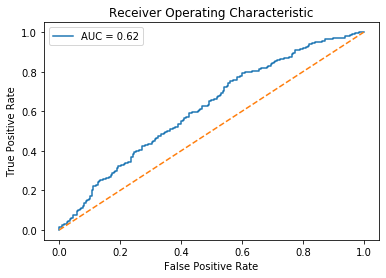

In [48]:
# predict probabilities for X_test using predict_proba
probabilities = bestFit_Knn.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

### Linear SVC MODEL ROC CURVE

0.565005347199174


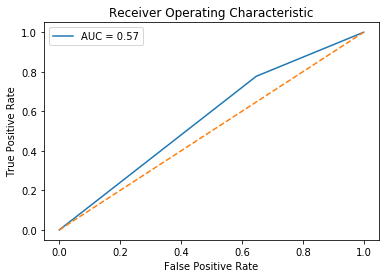

In [49]:
pred = svc_best_fit.predict(X_test)

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred, pos_label=1)

# calculate AUC
roc_auc_clf = auc(false_positive_rate, true_positive_rate)
print(roc_auc_clf)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot_clf = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc_clf))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

### Random FOrest ROC CUrve

0.6151553146242824


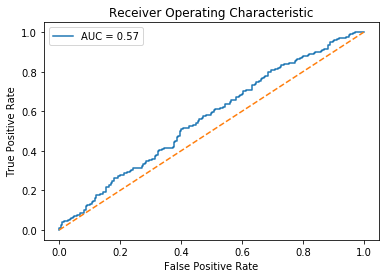

In [50]:
# predict probabilities for X_test using predict_proba
probabilities_rf = bestFit_RF.predict_proba(X_test)

# select the probabilities for label 1.0
rf_y_proba = probabilities_rf[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_y_proba, pos_label=1)

# calculate AUC
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc_rf))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

# Final Model

In [51]:
#Going to train with best hyper parameter
parameters = {'metric': ['euclidean'], 'n_neighbors': [100], 'weights': ['distance']}
n_folds = 10
#FInal result obtained
final_model = GridSearchCV(KNeighborsClassifier(), 
                           parameters, cv=n_folds, 
                           verbose = 1, n_jobs = -1, 
                                scoring="f1")
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


              precision    recall  f1-score   support

         0.0       0.60      0.01      0.03       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.70      0.51      0.46       993
weighted avg       0.75      0.79      0.71       993



In [ ]:
#  bb_img = io.imread('dataset/test_img/bb.jpg')

In [ ]:
# plt.imshow(bb_img)

In [ ]:
# bb_img_grey = rgb2grey(bb_img)
# plt.imshow(bb_img_grey)

In [ ]:
# bb_hog_features, bb_hog_image = hog(bb_img_grey,
#                               visualize=True,
#                               block_norm='L2-Hys',
#                               pixels_per_cell=(16, 16))
# print(bb_hog_features)
# to_predict = [bb_hog_features]
# a =np.array(to_predict)
# # show our hog_image with a grey colormap
# plt.imshow(bb_hog_image, cmap=plt.cm.gray)